# In class Assignment3: Linear Regression, Support Vector Regression (SVR), Decision Tree Regression and Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## Importing the dataset

In [3]:
dataset = pd.read_csv('heart.data.csv')

## Check out if there any missing value and any categorical column

In [4]:
dataset.isnull().sum()

biking           3
smoking          4
heart.disease    1
dtype: int64

In [5]:
Imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
dataset['biking']=Imputer.fit_transform(dataset[['biking']])

In [6]:
dataset['smoking'] = Imputer.fit_transform(dataset[['smoking']])

In [7]:
dataset['heart.disease']= Imputer.fit_transform(dataset[['heart.disease']])

In [8]:
dataset.isnull().sum()

biking           0
smoking          0
heart.disease    0
dtype: int64

## Create different copies of your dataset for using in Linear Regression, SVR, DT, RF

In [9]:
ds_lr = dataset.copy()
ds_svr = dataset.copy()
ds_dt = dataset.copy()
ds_rf = dataset.copy()

## 1. Linear Regression

In [10]:
X = dataset[['biking', 'smoking']]
y = dataset[['heart.disease']]

## Splitting the dataset into the Training set and Test set¶

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

## Predicting the Test set results

In [12]:
y_pred = regressor.predict(X_test)

## validation dataset
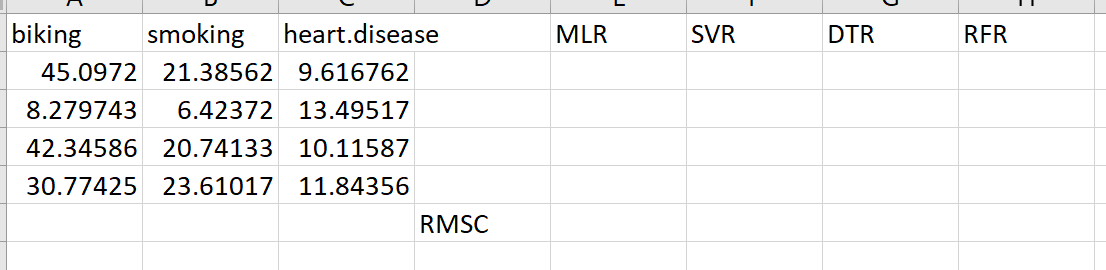!
Fill up the excel

In [13]:
#Case1
regressor.predict([[45.0972, 21.38562]])

array([[9.77341069]])

In [14]:
#Case2
regressor.predict([[8.279743, 6.42372]])

array([[14.46086103]])

In [15]:
#Case3
regressor.predict([[42.34586, 20.74133]])

array([[10.20863669]])

In [16]:
#Case3
regressor.predict([[30.77425, 23.61017]])

array([[13.03916779]])

## Evaluating the Model Performance using r2score and rmsc

In [17]:
from sklearn.metrics import r2_score
print('R-Square', r2_score(y_test, y_pred))

R-Square 0.9721701865775347


In [18]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms = sqrt(msc(y_test, y_pred))
print('The Mean Square Error is', rms)

The Mean Square Error is 0.7416335573628838


# 2. Support Vector Regressor

## Selecting the copied dataset

In [19]:
ds_svr.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


## Splitting the dataset into the Training set and Test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

## Feature Scaling:- X_train and y_train
- X_train = sc_X.fit_transform(X_train)
- y_train = sc_y.fit_transform(y_train)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [22]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\jsche\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting the Test set results

In [23]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))


## Validation dataset
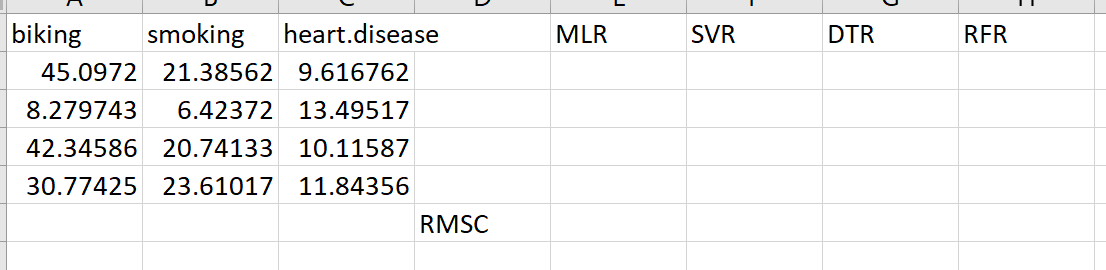
Fill up the excel

In [24]:
#Case1 check the sample
sc_y.inverse_transform(regressor.predict(sc_X.transform([[45.092, 21.385]])).reshape(-1,1))

array([[9.5389144]])

In [25]:
#Case2
sc_y.inverse_transform(regressor.predict(sc_X.transform([[8.270743, 6.42372]])).reshape(-1,1))

array([[14.47286234]])

In [26]:
#Case3
sc_y.inverse_transform(regressor.predict(sc_X.transform([[42.34586, 20.74133]])).reshape(-1,1))

array([[9.97610421]])

In [27]:
#Case4
sc_y.inverse_transform(regressor.predict(sc_X.transform([[30.77425, 23.61017]])).reshape(-1,1))

array([[12.98144796]])

## Evaluating the Model Performance using r2score and rmsc

In [28]:
print('R-Square', r2_score(y_test, y_pred))

R-Square 0.970752846257801


In [29]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms = sqrt(msc(y_test, y_pred))
print('The Mean Square Error is', rms)

The Mean Square Error is 0.7602843119579635


## Training the Decision Tree Regression model on the Training set

## 3. Decision Tree Regression

In [30]:
y_pred = regressor.predict(X_test)

##  Selecting the copied dataset

In [31]:
ds_dt.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


## Splitting the dataset into the Training set and Test set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

## Training the Decision Tree Regression model on the Training set

In [33]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [34]:
y_pred = regressor.predict(X_test)

## Validation dataset
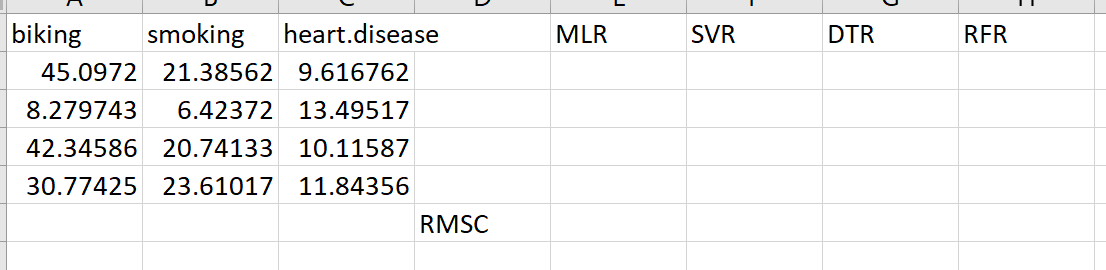
Fill up the excel

In [35]:
#Case1
regressor.predict([[45.0972, 21.38562]])

array([10.86552244])

In [36]:
#Case2
regressor.predict([[8.279743, 6.42372]])

array([14.44377369])

In [37]:
#Case3
regressor.predict([[42.34586, 20.74133]])

array([11.77859616])

In [38]:
#Case4
regressor.predict([[30.77425, 23.61017]])

array([13.28367033])

## Evaluating the Model Performance using r2score and rmsc

In [39]:
print('R-Square', r2_score(y_test, y_pred))

R-Square 0.9420934562371481


In [40]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms = sqrt(msc(y_test, y_pred))
print('The Mean Square Error is', rms)

The Mean Square Error is 1.0697888010621766


# 4. Random Forest Regression

## Selecting the copied dataset

In [41]:
ds_rf.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


## Splitting the dataset into the Training set and Test set

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

## Training the Decision Tree Regression model on the Training set

In [43]:
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X,y)

<ipython-input-43-68cabda6749f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor(n_estimators=20, random_state=0)

## Predicting the Test set results

In [48]:
y_pred = regressor.predict(X_test)

## Validation dataset
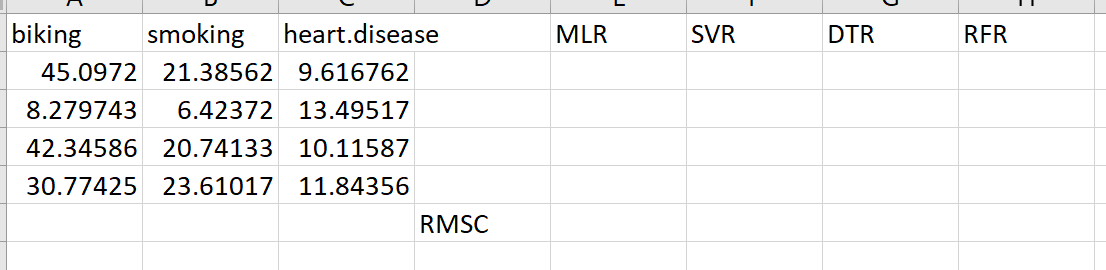

In [49]:
#Case1
regressor.predict([[45.0972, 21.38562]])

array([9.31145191])

In [50]:
#Case2
regressor.predict([[8.279743, 6.42372]])

array([14.28740131])

In [51]:
#Case3
regressor.predict([[42.34586, 20.74133]])

array([9.5566818])

In [52]:
#Case4
regressor.predict([[30.77425, 23.61017]])

array([13.05347471])

## Evaluating the Model Performance

In [55]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms = sqrt(msc(y_test, y_pred))
print('The Mean Square Error is', rms)

The Mean Square Error is 0.33440080792667576
